# Shape of a B-spline

A B-splines is a finite-support function that is even-symmetric and
blob-shaped. Here, we plot a B-spline over its support, indexed by its
degree. The hollow (blue or red) circles indicate the samples at the
integers. The small filled (black) discs indicate the location of the
knots of the spline.

In [1]:
# Load the required libraries.
from ipywidgets import interactive
import splinekit as sk
import matplotlib as plt

# Define the plot function
def b_spline_plot (
    degree = 3
):
    # Support of a B-spline
    supp = sk.b_spline_support(degree)
    # Avoid overlap with a margin at each side
    period = 1 + supp.diameter + 1
    # Construct a spline from a non-overlapping periodic B-spline
    s = sk.PeriodicSpline1D.periodized_b_spline(
        period = int(period),
        degree = degree
    )
    # Plot the B-spline
    s.plot(
        plt.pyplot.subplots(),
        plotdomain = sk.interval.Closed((-0.5 * supp.diameter, 0.5 * supp.diameter)),
        plotrange = sk.interval.Closed((-0.05, 1.05)),
        plotpoints = 201
    )

# Interact with the degree
interactive(b_spline_plot, degree = (0, 30))

interactive(children=(IntSlider(value=3, description='degree', max=30), Output()), _dom_classes=('widget-inter…

# A Family of B-Splines

We now plot the first ten members of the family of B-splines, as ordered
by their degree.

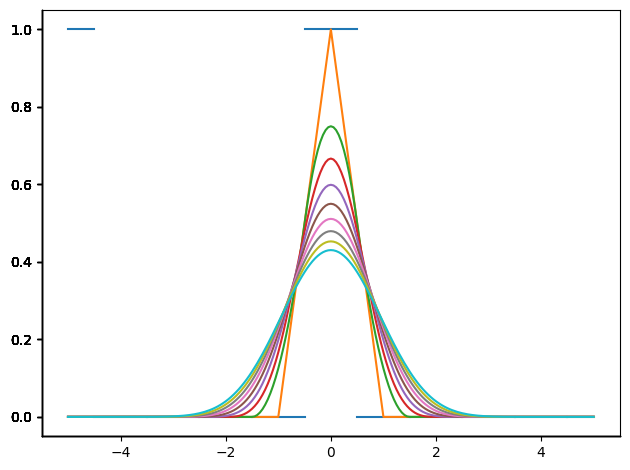

In [2]:
# Load the required libraries.
import splinekit as sk
import matplotlib as plt

# Setup
highest_degree = 9
largest_supp = sk.b_spline_support(highest_degree)
period = int(largest_supp.diameter)
subplot = plt.pyplot.subplots()
# One plot per degree
for degree in range(highest_degree + 1):
    # Construct a spline from a non-overlapping periodic B-spline
    s = sk.PeriodicSpline1D.periodized_b_spline(
        period = period,
        degree = degree
    )
    # Add the plot of the B-spline, with reduced cluttering
    s.plot(
        subplot,
        plotdomain = sk.interval.Open((-0.5 * period, 0.5 * period)),
        plotrange = sk.interval.Closed((-0.05, 1.05)),
        plotpoints = 201,
        line_fmt = "-C" + str(degree), # Distinguish degrees by color
        marker_fmt = "", # No markers at the integers
        stem_fmt = "None", # No stems at the integers
        knot_marker = "", # No knots at the integers
        periodbound_marker_fmt = "", # No marker at the period bounds
        periodbound_stem_fmt = "None" # No stem at the period bounds
    )
plt.pyplot.show()